In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


In [3]:
# Read CSV files for each country
data_country1 = pd.read_csv('../data/benin-malanville.csv')
data_country2 = pd.read_csv('../data/sierraleone-bumbuna.csv')
data_country3 = pd.read_csv('../data/togo-dapaong_qc.csv')

In [8]:
# Convert 'Timestamp' column to datetime format
data_country1['Timestamp'] = pd.to_datetime(data_country1['Timestamp'])
data_country2['Timestamp'] = pd.to_datetime(data_country2['Timestamp'])
data_country3['Timestamp'] = pd.to_datetime(data_country3['Timestamp'])

In [9]:
# Set 'Timestamp' column as index
data_country1.set_index('Timestamp', inplace=True)
data_country2.set_index('Timestamp', inplace=True)
data_country3.set_index('Timestamp', inplace=True)

In [11]:
# Resample data on a monthly basis and aggregate using mean
data_country1_monthly = data_country1.resample('ME').mean()
data_country2_monthly = data_country2.resample('ME').mean()
data_country3_monthly = data_country3.resample('ME').mean()

In [12]:
# Calculate summary statistics for each country
summary_stats_country1 = data_country1.describe()
summary_stats_country2 = data_country2.describe()
summary_stats_country3 = data_country3.describe()


print("Summary Statistics for Country 1:\n", summary_stats_country1)
print("\nSummary Statistics for Country 2:\n", summary_stats_country2)
print("\nSummary Statistics for Country 3:\n", summary_stats_country3)

Summary Statistics for Country 1:
                  GHI            DNI            DHI           ModA  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      240.559452     167.187516     115.358961     236.589496   
std       331.131327     261.710501     158.691074     326.894859   
min       -12.900000      -7.800000     -12.600000       0.000000   
25%        -2.000000      -0.500000      -2.100000       0.000000   
50%         1.800000      -0.100000       1.600000       4.500000   
75%       483.400000     314.200000     216.300000     463.700000   
max      1413.000000     952.300000     759.200000    1342.300000   

                ModB           Tamb             RH             WS  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      228.883576      28.179683      54.487969       2.121113   
std       316.536515       5.924297      28.073069       1.603466   
min         0.000000      11.000000       2.100000       0.000000  

In [13]:
# Check for missing values for each country
missing_values_country1 = data_country1.isnull().sum()
missing_values_country2 = data_country2.isnull().sum()
missing_values_country3 = data_country3.isnull().sum()

print("Missing Values for Country 1:\n", missing_values_country1)
print("\nMissing Values for Country 2:\n", missing_values_country2)
print("\nMissing Values for Country 3:\n", missing_values_country3)

# Check for outliers (e.g., negative values) for each country
negative_values_country1 = data_country1.loc[:, data_country1.columns != 'Timestamp'].lt(0).sum()
negative_values_country2 = data_country2.loc[:, data_country2.columns != 'Timestamp'].lt(0).sum()
negative_values_country3 = data_country3.loc[:, data_country3.columns != 'Timestamp'].lt(0).sum()

print("\nNegative Values for Country 1:\n", negative_values_country1)
print("\nNegative Values for Country 2:\n", negative_values_country2)
print("\nNegative Values for Country 3:\n", negative_values_country3)


Missing Values for Country 1:
 GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Missing Values for Country 2:
 GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Missing Values for Country 3:
 GHI            

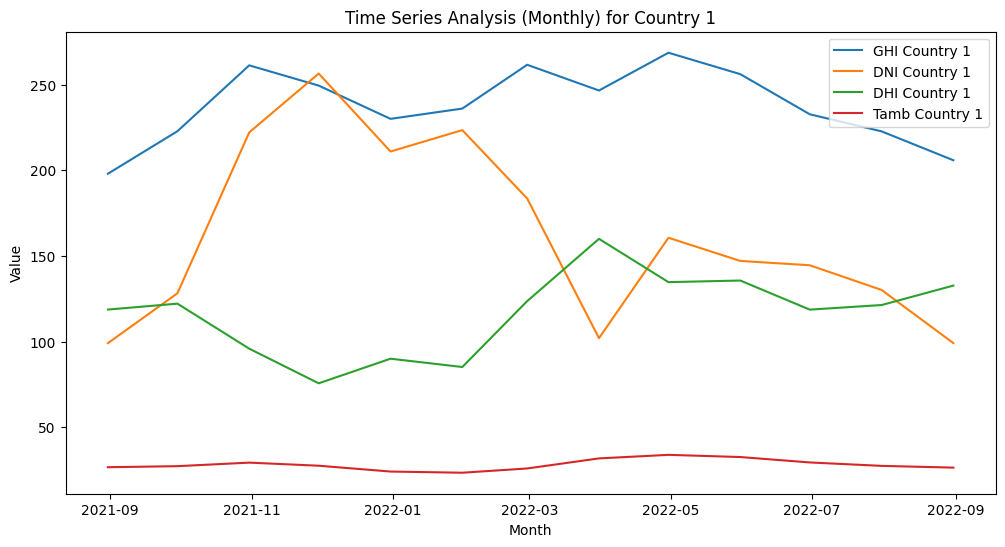

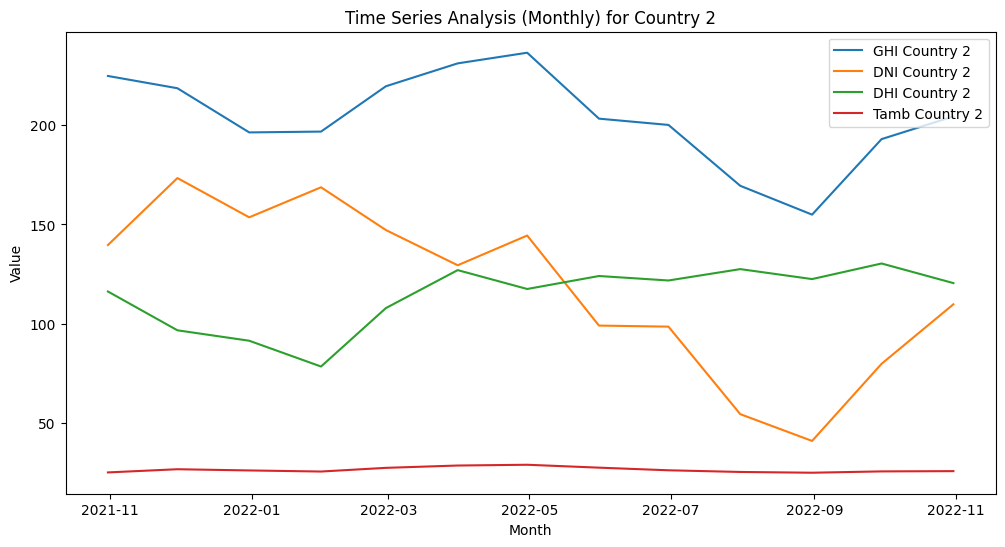

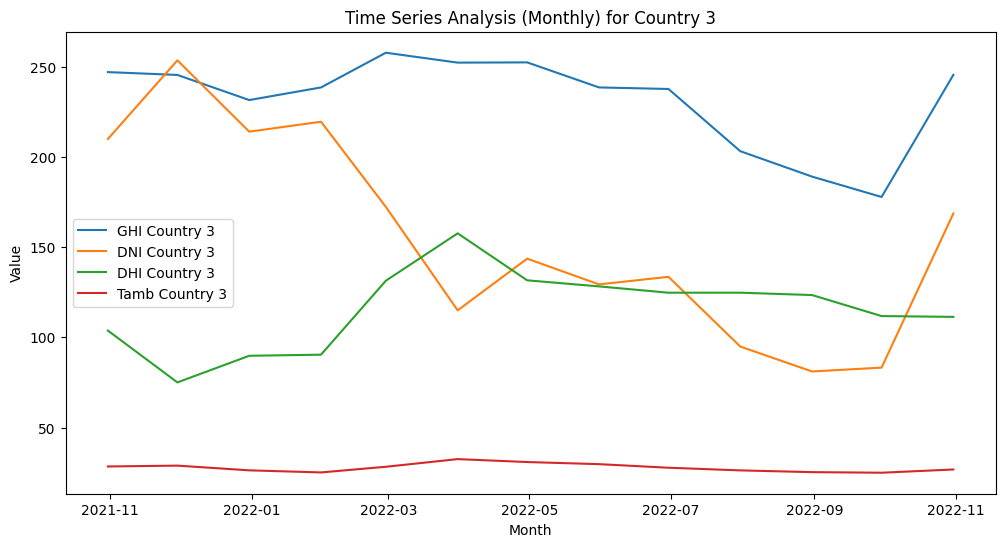

In [14]:
import matplotlib.pyplot as plt

# Plot Time Series Analysis (Monthly)
plt.figure(figsize=(12, 6))
plt.plot(data_country1_monthly.index, data_country1_monthly['GHI'], label='GHI Country 1')
plt.plot(data_country1_monthly.index, data_country1_monthly['DNI'], label='DNI Country 1')
plt.plot(data_country1_monthly.index, data_country1_monthly['DHI'], label='DHI Country 1')
plt.plot(data_country1_monthly.index, data_country1_monthly['Tamb'], label='Tamb Country 1')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Time Series Analysis (Monthly) for Country 1')
plt.legend()
plt.show()

# Plot Time Series Analysis (Monthly)
plt.figure(figsize=(12, 6))
plt.plot(data_country2_monthly.index, data_country2_monthly['GHI'], label='GHI Country 2')
plt.plot(data_country2_monthly.index, data_country2_monthly['DNI'], label='DNI Country 2')
plt.plot(data_country2_monthly.index, data_country2_monthly['DHI'], label='DHI Country 2')
plt.plot(data_country2_monthly.index, data_country2_monthly['Tamb'], label='Tamb Country 2')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Time Series Analysis (Monthly) for Country 2')
plt.legend()
plt.show()

# Plot Time Series Analysis (Monthly)
plt.figure(figsize=(12, 6))
plt.plot(data_country3_monthly.index, data_country3_monthly['GHI'], label='GHI Country 3')
plt.plot(data_country3_monthly.index, data_country3_monthly['DNI'], label='DNI Country 3')
plt.plot(data_country3_monthly.index, data_country3_monthly['DHI'], label='DHI Country 3')
plt.plot(data_country3_monthly.index, data_country3_monthly['Tamb'], label='Tamb Country 3')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Time Series Analysis (Monthly) for Country 3')
plt.legend()
plt.show()


In [15]:
# Calculate correlation matrix for each country
correlation_matrix_country1 = data_country1.corr()
correlation_matrix_country2 = data_country2.corr()
correlation_matrix_country3 = data_country3.corr()

print("Correlation Matrix for Country 1:\n", correlation_matrix_country1)
print("\nCorrelation Matrix for Country 2:\n", correlation_matrix_country2)
print("\nCorrelation Matrix for Country 3:\n", correlation_matrix_country3)


Correlation Matrix for Country 1:
                     GHI       DNI       DHI      ModA      ModB      Tamb  \
GHI            1.000000  0.882376  0.849989  0.994443  0.994869  0.547513   
DNI            0.882376  1.000000  0.546602  0.892023  0.892012  0.467584   
DHI            0.849989  0.546602  1.000000  0.829923  0.827886  0.503925   
ModA           0.994443  0.892023  0.829923  1.000000  0.998745  0.526868   
ModB           0.994869  0.892012  0.827886  0.998745  1.000000  0.525370   
Tamb           0.547513  0.467584  0.503925  0.526868  0.525370  1.000000   
RH            -0.360029 -0.373475 -0.285018 -0.383205 -0.365718 -0.414842   
WS             0.457349  0.397099  0.426959  0.458483  0.450123  0.347188   
WSgust         0.484144  0.419469  0.450904  0.484429  0.476380  0.362403   
WSstdev        0.446526  0.383303  0.414711  0.443467  0.438523  0.342418   
WD             0.079664  0.018839  0.102752  0.050262  0.061473  0.188081   
WDstdev        0.547242  0.471152  0.5059

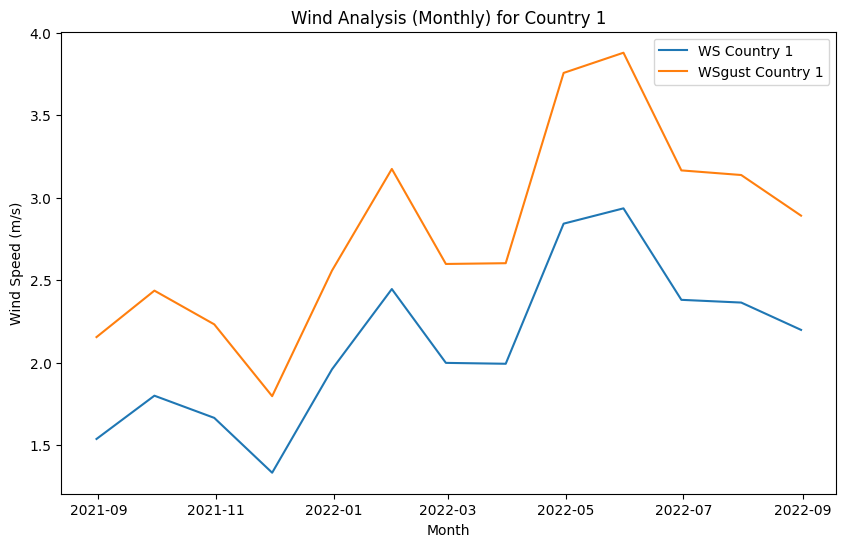

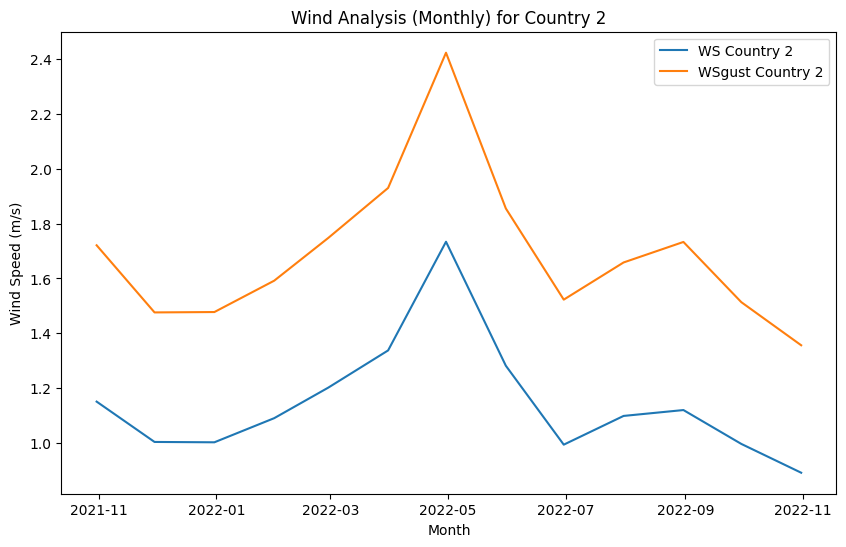

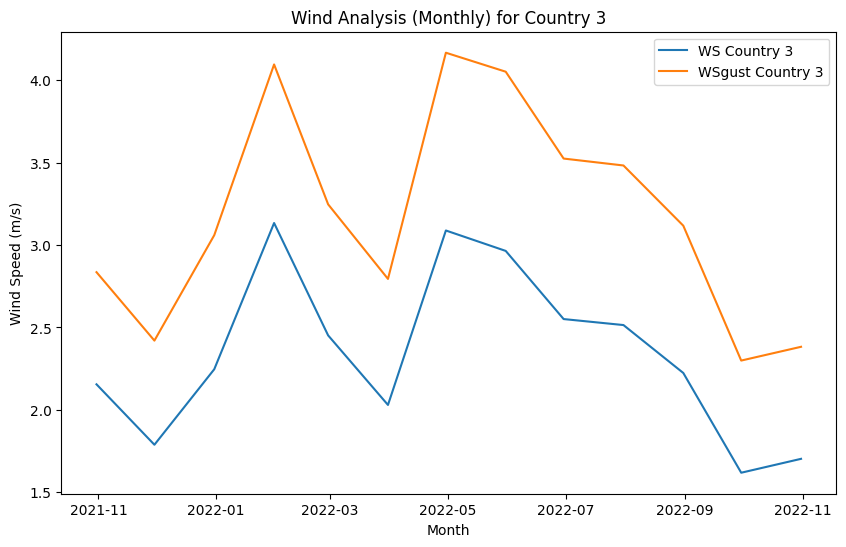

In [16]:
# Wind Analysis country1
plt.figure(figsize=(10, 6))
plt.plot(data_country1_monthly.index, data_country1_monthly['WS'], label='WS Country 1')
plt.plot(data_country1_monthly.index, data_country1_monthly['WSgust'], label='WSgust Country 1')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Analysis (Monthly) for Country 1')
plt.legend()
plt.show()

# Wind Analysis country2
plt.figure(figsize=(10, 6))
plt.plot(data_country2_monthly.index, data_country2_monthly['WS'], label='WS Country 2')
plt.plot(data_country2_monthly.index, data_country2_monthly['WSgust'], label='WSgust Country 2')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Analysis (Monthly) for Country 2')
plt.legend()
plt.show()

# Wind Analysis for country3
plt.figure(figsize=(10, 6))
plt.plot(data_country3_monthly.index, data_country3_monthly['WS'], label='WS Country 3')
plt.plot(data_country3_monthly.index, data_country3_monthly['WSgust'], label='WSgust Country 3')
plt.xlabel('Month')
plt.ylabel('Wind Speed (m/s)')
plt.title('Wind Analysis (Monthly) for Country 3')
plt.legend()
plt.show()


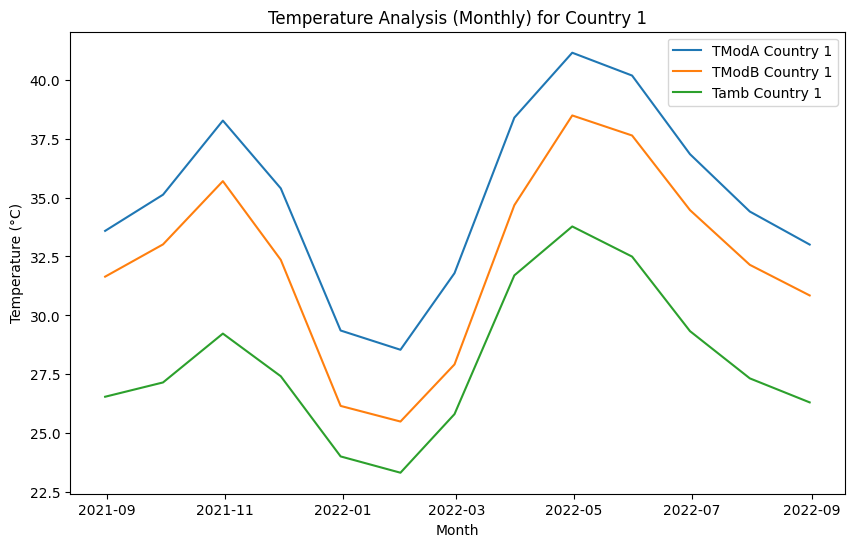

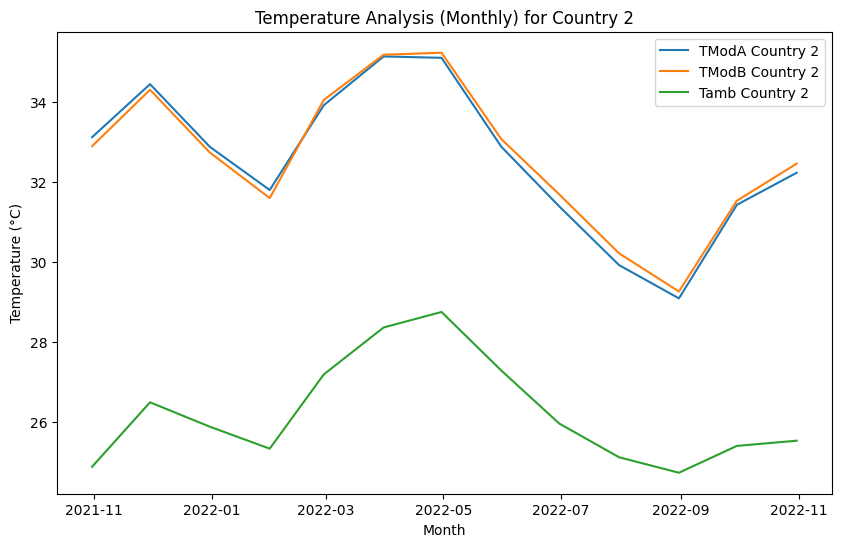

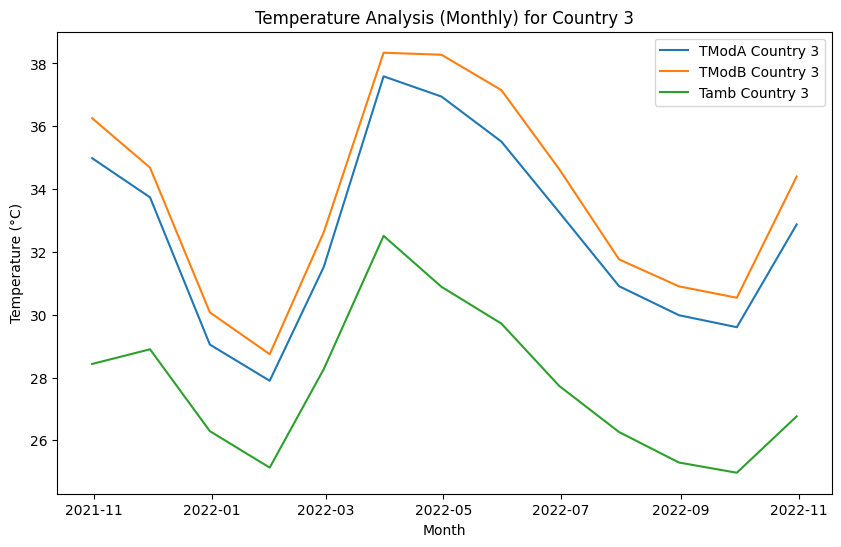

In [17]:
# Temperature Analysis
plt.figure(figsize=(10, 6))
plt.plot(data_country1_monthly.index, data_country1_monthly['TModA'], label='TModA Country 1')
plt.plot(data_country1_monthly.index, data_country1_monthly['TModB'], label='TModB Country 1')
plt.plot(data_country1_monthly.index, data_country1_monthly['Tamb'], label='Tamb Country 1')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Analysis (Monthly) for Country 1')
plt.legend()
plt.show()

# Temperature Analysis
plt.figure(figsize=(10, 6))
plt.plot(data_country2_monthly.index, data_country2_monthly['TModA'], label='TModA Country 2')
plt.plot(data_country2_monthly.index, data_country2_monthly['TModB'], label='TModB Country 2')
plt.plot(data_country2_monthly.index, data_country2_monthly['Tamb'], label='Tamb Country 2')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Analysis (Monthly) for Country 2')
plt.legend()
plt.show()

# Temperature Analysis
plt.figure(figsize=(10, 6))
plt.plot(data_country3_monthly.index, data_country3_monthly['TModA'], label='TModA Country 3')
plt.plot(data_country3_monthly.index, data_country3_monthly['TModB'], label='TModB Country 3')
plt.plot(data_country3_monthly.index, data_country3_monthly['Tamb'], label='Tamb Country 3')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Analysis (Monthly) for Country 3')
plt.legend()
plt.show()


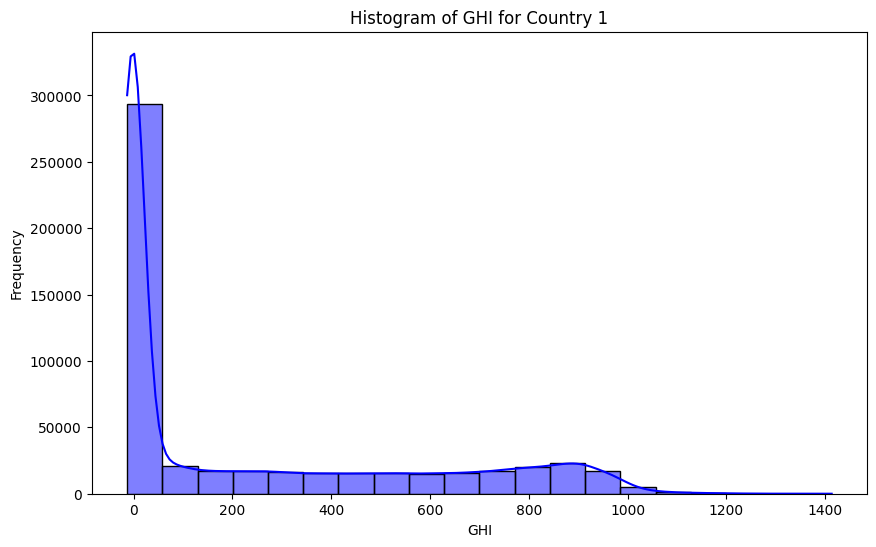

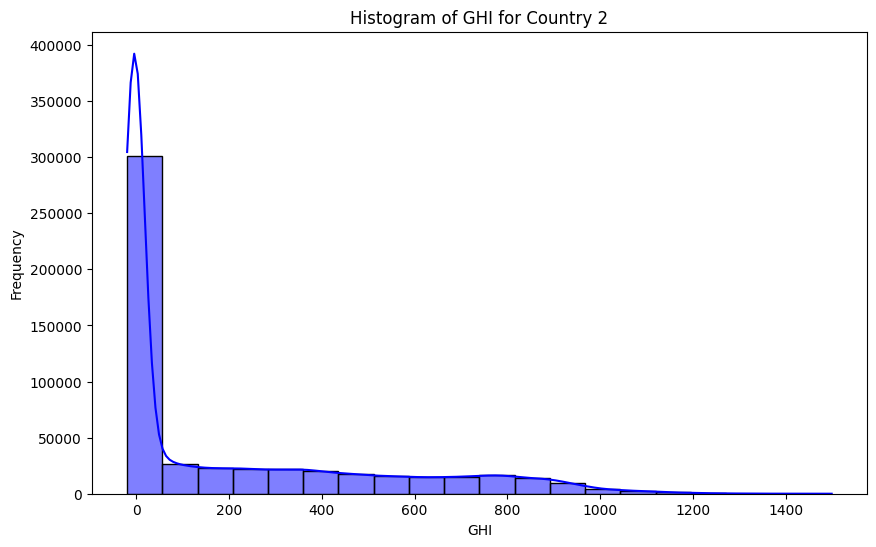

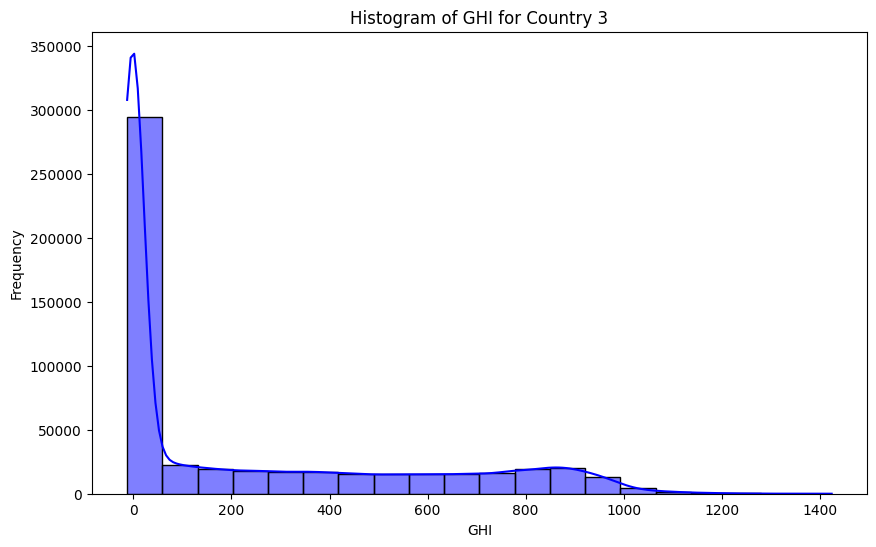

In [18]:
# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=data_country1, x='GHI', bins=20, kde=True, color='blue')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.title('Histogram of GHI for Country 1')
plt.show()

# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=data_country2, x='GHI', bins=20, kde=True, color='blue')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.title('Histogram of GHI for Country 2')
plt.show()

# Histograms
plt.figure(figsize=(10, 6))
sns.histplot(data=data_country3, x='GHI', bins=20, kde=True, color='blue')
plt.xlabel('GHI')
plt.ylabel('Frequency')
plt.title('Histogram of GHI for Country 3')
plt.show()

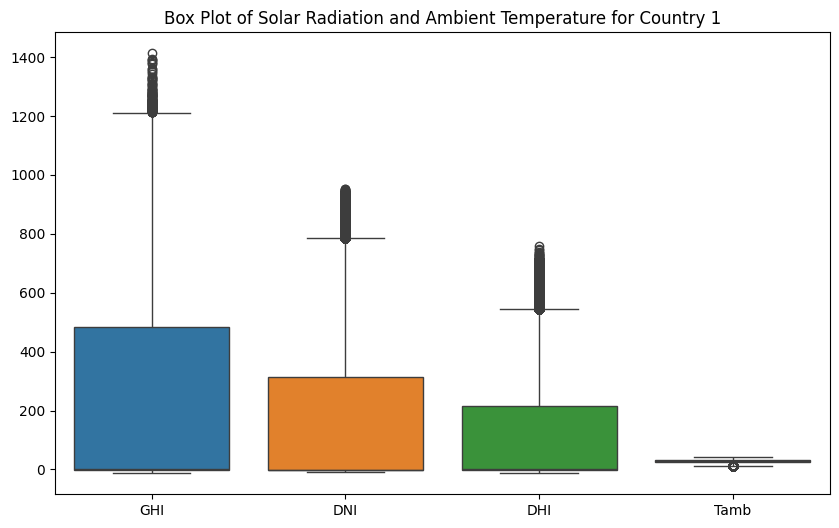

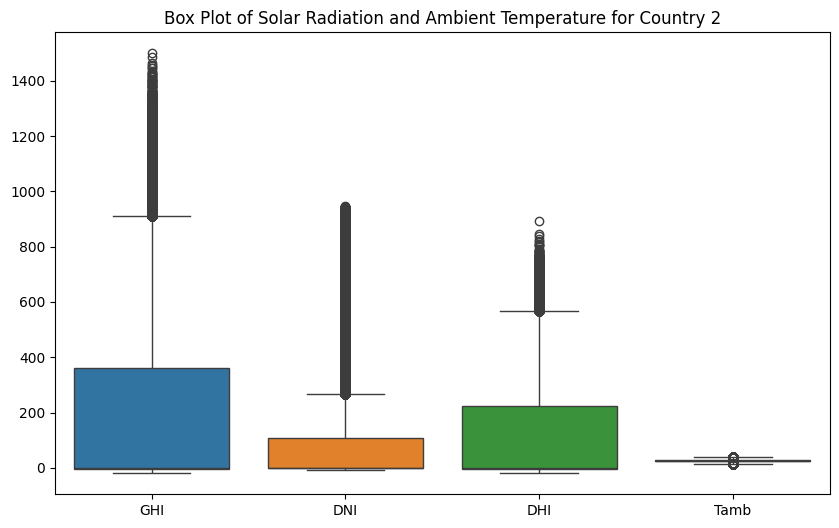

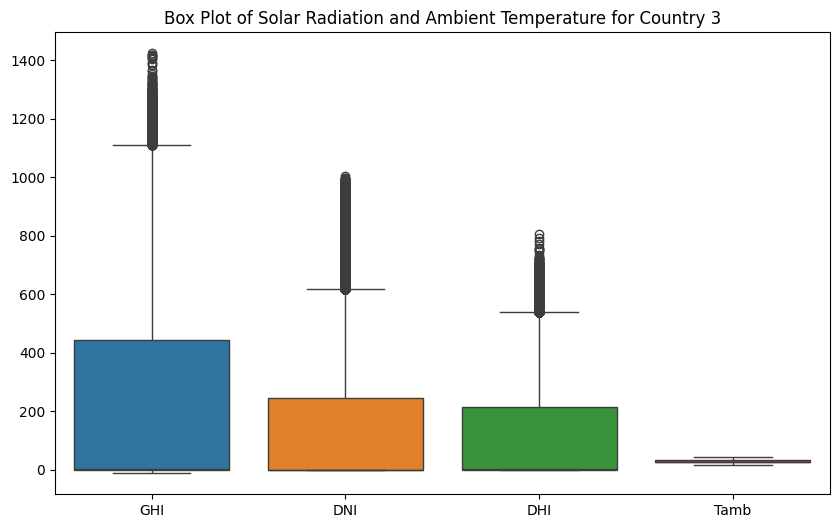

In [19]:
# Create box plots for each country
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_country1[['GHI', 'DNI', 'DHI', 'Tamb']])
plt.title('Box Plot of Solar Radiation and Ambient Temperature for Country 1')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_country2[['GHI', 'DNI', 'DHI', 'Tamb']])
plt.title('Box Plot of Solar Radiation and Ambient Temperature for Country 2')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_country3[['GHI', 'DNI', 'DHI', 'Tamb']])
plt.title('Box Plot of Solar Radiation and Ambient Temperature for Country 3')
plt.show()


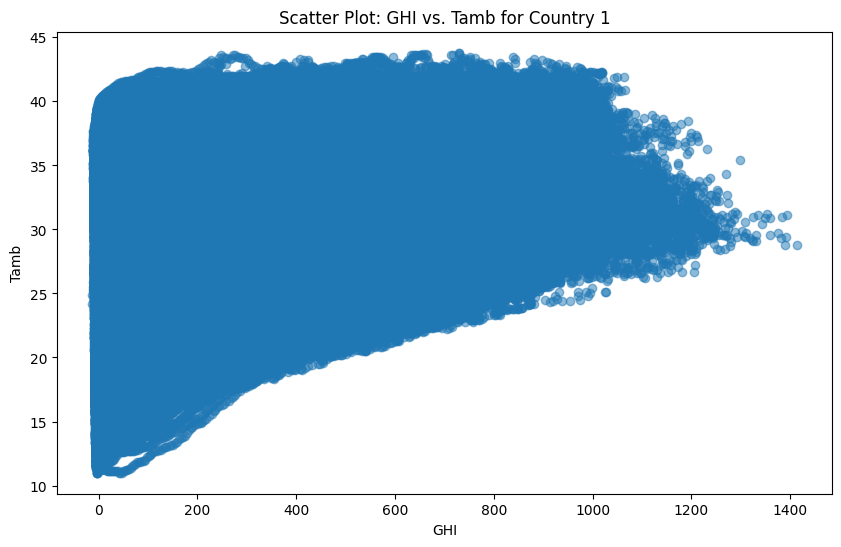

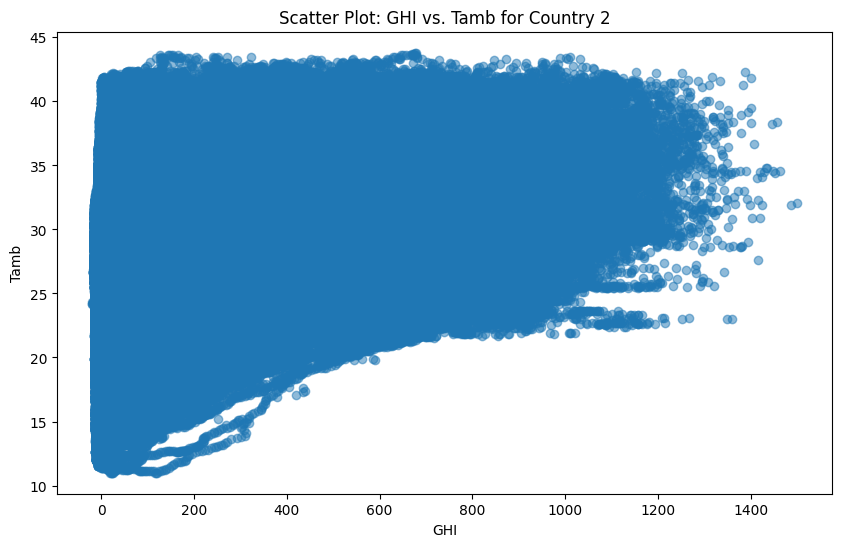

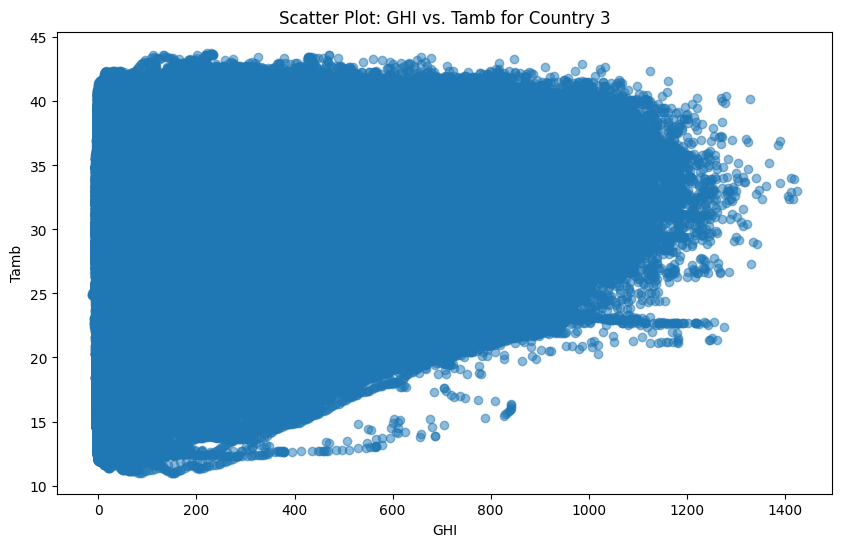

In [20]:
# Scatter Plots
plt.figure(figsize=(10, 6))
plt.scatter(data_country1['GHI'], data_country1['Tamb'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Scatter Plot: GHI vs. Tamb for Country 1')
plt.show()

# Scatter Plots
plt.figure(figsize=(10, 6))
plt.scatter(data_country2['GHI'], data_country1['Tamb'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Scatter Plot: GHI vs. Tamb for Country 2')
plt.show()

# Scatter Plots
plt.figure(figsize=(10, 6))
plt.scatter(data_country3['GHI'], data_country1['Tamb'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Scatter Plot: GHI vs. Tamb for Country 3')
plt.show()

In [21]:
# Data Cleaning country1

print("Before data cleaning:")
print("Number of rows before cleaning:", len(data_country1))
print("Number of missing values:\n", data_country1.isnull().sum())
print("Number of negative GHI values:", (data_country1['GHI'] < 0).sum())

# Handle missing values country1
data_country1_cleaned = data_country1.dropna()

# Handle anomalies (e.g., negative values) country1
data_country1_cleaned = data_country1_cleaned[data_country1_cleaned['GHI'] >= 0]

print("\nAfter data cleaning:")
print("Number of rows after cleaning:", len(data_country1_cleaned))



Before data cleaning:
Number of rows before cleaning: 525600
Number of missing values:
 GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Number of negative GHI values: 258847

After data cleaning:
Number of rows after cleaning: 0


In [22]:
# Data Cleaning country2

print("Before data cleaning:")
print("Number of rows before cleaning:", len(data_country2))
print("Number of missing values:\n", data_country2.isnull().sum())
print("Number of negative GHI values:", (data_country2['GHI'] < 0).sum())

# Handle missing values
data_country2_cleaned = data_country2.dropna()

# Handle anomalies (e.g., negative values) country1
data_country2_cleaned = data_country2_cleaned[data_country2_cleaned['GHI'] >= 0]

print("\nAfter data cleaning:")
print("Number of rows after cleaning:", len(data_country2_cleaned))

Before data cleaning:
Number of rows before cleaning: 525600
Number of missing values:
 GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Number of negative GHI values: 261135

After data cleaning:
Number of rows after cleaning: 0


In [23]:
# Data Cleaning country3

print("Before data cleaning:")
print("Number of rows before cleaning:", len(data_country3))
print("Number of missing values:\n", data_country3.isnull().sum())
print("Number of negative GHI values:", (data_country3['GHI'] < 0).sum())

# Handle missing values
data_country3_cleaned = data_country3.dropna()

# Handle anomalies (e.g., negative values) country1
data_country3_cleaned = data_country3_cleaned[data_country3_cleaned['GHI'] >= 0]

print("\nAfter data cleaning:")
print("Number of rows after cleaning:", len(data_country3_cleaned))

Before data cleaning:
Number of rows before cleaning: 525600
Number of missing values:
 GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64
Number of negative GHI values: 257385

After data cleaning:
Number of rows after cleaning: 0
